### Lab-1 Batch-1 30-07-2022
### 200968108
## **Fashion MNIST Dataset**

### ***Metadata:***
Fashion-MNIST is a dataset of Zalando's fashion images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot



### Importing required libraries and loading dataset

In [1]:
# Importing required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics

In [2]:
#checking the version of the package/module.
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


In [3]:
#Importing and loading the fashion MNIST Dataset using keras
fmnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fmnist.load_data() #returns output in pairs of tuples

### 1. Find the number of classes

In [4]:
#Classes will be the unique elements from the labeled data.
l = len(np.unique(y_train))
print(f"There are {l} classes in the given data.")

There are 10 classes in the given data.


### 2. Find the dimensions of each image

In [5]:
#checking the shape of train and test datasets
print("Training data: ", x_train.shape)
print("Test data: ",x_test.shape)
print(f"Dimensions of each image are {x_train.shape[1]} x {x_train.shape[2]} pixels.")

Training data:  (60000, 28, 28)
Test data:  (10000, 28, 28)
Dimensions of each image are 28 x 28 pixels.


### 3. Display one image from each class

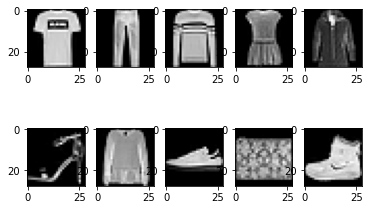

In [6]:
# the below code returns a tuple containing an array of unique values and an array of their indexes in the y_test data into a.
(x,id) = np.unique(y_train, return_index=True)

for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[id[i]],cmap="gray")



### 4. Perform Normalization

In [7]:
#Normalizing the training data
x_train = x_train/255.0
x_test = x_test/255.0

### 5. Build two neural networks with 2 hidden layers and 5 hidden layers.

Network-1 (2 Hidden Layers)

In [8]:
# Building network - 1 with 2 hidden layers

model1 = tf.keras.Sequential()  
# Another API is functional() but Sequential has more advantages.

model1.add(tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"))
model1.add(tf.keras.layers.Dense(350,activation="relu",name="hiddenlayer1"))
model1.add(tf.keras.layers.Dense(150,activation="relu",name="hiddenlayer2"))
model1.add(tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"))


In [9]:
# Summary gives us the total number of neurons and parameters optimized at each layer.
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 350)               274750    
                                                                 
 hiddenlayer2 (Dense)        (None, 150)               52650     
                                                                 
 outputlayer (Dense)         (None, 10)                1510      
                                                                 
Total params: 328,910
Trainable params: 328,910
Non-trainable params: 0
_________________________________________________________________


Network-2 (5 Hidden Layers)

In [10]:
# Building network-2 with 5 hidden layers

model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"))
model2.add(tf.keras.layers.Dense(500,activation="relu",name="hiddenlayer1"))
model2.add(tf.keras.layers.Dense(400,activation="relu",name="hiddenlayer2"))
model2.add(tf.keras.layers.Dense(300,activation="relu",name="hiddenlayer3"))
model2.add(tf.keras.layers.Dense(200,activation="relu",name="hiddenlayer4"))
model2.add(tf.keras.layers.Dense(100,activation="relu",name="hiddenlayer5"))
model2.add(tf.keras.layers.Dense(10,activation="softmax",name="outputlayer"))
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 500)               392500    
                                                                 
 hiddenlayer2 (Dense)        (None, 400)               200400    
                                                                 
 hiddenlayer3 (Dense)        (None, 300)               120300    
                                                                 
 hiddenlayer4 (Dense)        (None, 200)               60200     
                                                                 
 hiddenlayer5 (Dense)        (None, 100)               20100     
                                                                 
 outputlayer (Dense)         (None, 10)               

### 6. Train and test the above two neural networks.

In [11]:
#Training our neural network model-1
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

batch_size = 32
epochs = 10

history= model1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4814 - accuracy: 0.8256 - val_loss: 0.4136 - val_accuracy: 0.8523
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3614 - accuracy: 0.8678 - val_loss: 0.3905 - val_accuracy: 0.8583
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3260 - accuracy: 0.8791 - val_loss: 0.3347 - val_accuracy: 0.8788
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3008 - accuracy: 0.8885 - val_loss: 0.3723 - val_accuracy: 0.8697
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2846 - accuracy: 0.8935 - val_loss: 0.3149 - val_accuracy: 0.8840
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2697 - accuracy: 0.8989 - val_loss: 0.3506 - val_accuracy: 0.8760
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2532 - accuracy: 0.9046 - val_loss: 0.3344 - val_accuracy:

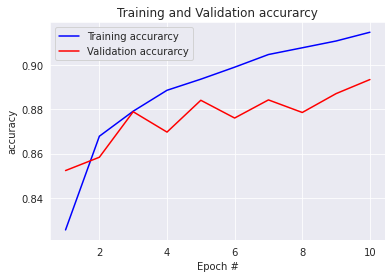

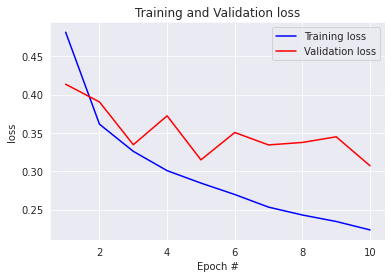

In [12]:
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [13]:
# evaluating our model
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.8851


[0.33399221301078796, 0.8851000070571899]

In [14]:
#Training our neural network model-2
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

batch_size = 32
epochs = 10

history= model2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.5111 - accuracy: 0.8142 - val_loss: 0.4404 - val_accuracy: 0.8403
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3860 - accuracy: 0.8606 - val_loss: 0.4027 - val_accuracy: 0.8615
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3476 - accuracy: 0.8743 - val_loss: 0.3717 - val_accuracy: 0.8683
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3209 - accuracy: 0.8817 - val_loss: 0.3468 - val_accuracy: 0.8797
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3010 - accuracy: 0.8902 - val_loss: 0.3970 - val_accuracy: 0.8562
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2862 - accuracy: 0.8941 - val_loss: 0.3456 - val_accuracy: 0.8860
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.8989 - val_loss: 0.3425 - val_accuracy:

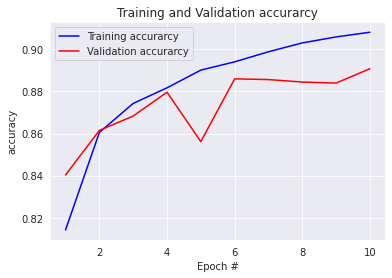

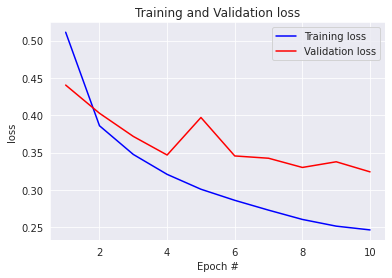

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


In [16]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.8852


[0.33396655321121216, 0.885200023651123]

### 7. Compare their performances.

***Network-1***

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred1 = model1.predict(x_test, len(y_test)//batch_size)
y_pred1 = np.argmax(Y_pred1, axis=1)

Confusion Matrix


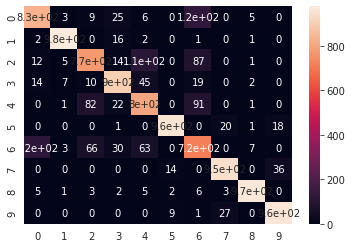

In [18]:
print('Confusion Matrix')
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1,annot = True)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1000
           1       0.98      0.98      0.98      1000
           2       0.82      0.77      0.80      1000
           3       0.89      0.90      0.90      1000
           4       0.78      0.80      0.79      1000
           5       0.97      0.96      0.97      1000
           6       0.69      0.71      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [20]:
print("Accuracy of Model-1: ", metrics.accuracy_score(y_test, y_pred1))

Accuracy of Model-1:  0.8851


***Network-2***

In [21]:
Y_pred2 = model2.predict(x_test, len(y_test)//batch_size)
y_pred2 = np.argmax(Y_pred2, axis=1)

Confusion Matrix


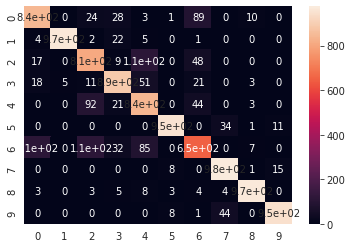

In [22]:
print('Confusion Matrix')
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2,annot = True)

In [23]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.88      0.89      0.89      1000
           4       0.76      0.84      0.80      1000
           5       0.98      0.95      0.97      1000
           6       0.76      0.65      0.70      1000
           7       0.92      0.98      0.95      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.88     10000
weighted avg       0.89      0.89      0.88     10000



In [24]:
print("Accuracy of Model-2: ", metrics.accuracy_score(y_test, y_pred2))

Accuracy of Model-2:  0.8852


### Both the Network models work almost in the same way with similar accuracy.